In [15]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* no null value
* column free sulfur dioxide and total sulfur dioxide have problem with stndard diviation as it should not be this large compare to mean value 
* we have outliers as we can see max value and 75% 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* quality is our target column

In [6]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

* As it is catagorical data we are separating it in to two catagories 
* All quality which are below 7 are zero and all those are 7 and above are 1

In [7]:
data['quality']=data['quality'].replace([3,4,5,6],0)

In [8]:
data['quality']=data['quality'].replace([7,8],1)

# we gona perform now EDA( Data processing analysis )
# PLOTING HEATMAP (CORRELATION MATRIX)
8 LET'S TRY TO SEE IF WE CAN REDUCE THE FEATURES USING DIFFERENT TECHNIQUES 


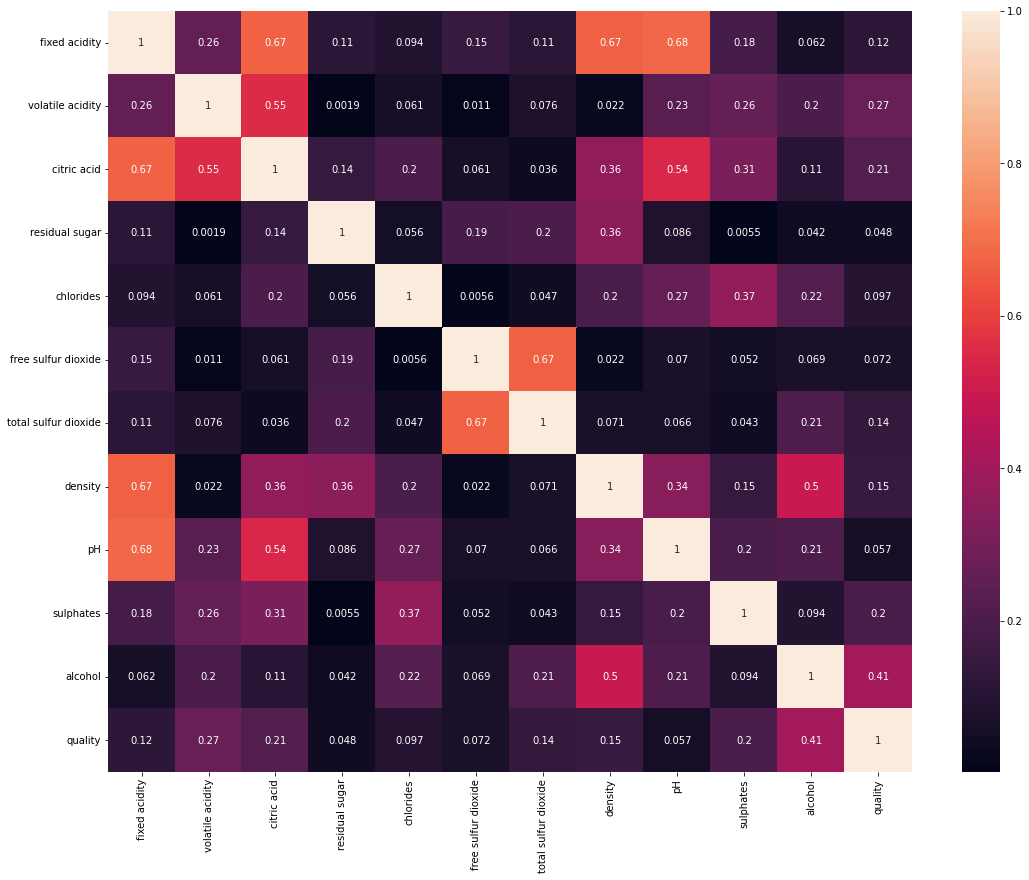

In [9]:
df_corr = data.corr().abs() 
plt.figure(figsize =(18,14))
sns.heatmap(df_corr,annot = True, annot_kws ={'size':10})
plt.show()

* it seems there is no correlation between any column
# Now lets split the data into train and test

In [16]:
x = data.drop(columns = ['quality'])
y = data['quality']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [46]:

def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
  if train:
    y_pred = clf.predict(x_train)
    print("\n...........Train result.................")
    print(f"Accuracy score:{accuracy_score(y_train,y_pred)* 100: .2f}%")

  elif train == False:
    pred = clf.predict(x_test)
    print("\n ------------Test Result-----------------")
    print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
    print('\n \n Test Classification Report \n ', classification_report(y_test, pred,digits=2))

    fpr,tpr,thresholds = roc_curve(y_test, pred)
 

In [18]:
# Model initialation
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
# Call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train = True) #  for training score

metric_score(clf,x_train,x_test,y_train,y_test,train = False) # for testing score


...........Train result.................
Accuracy score: 98.25%

 ------------Test Result-----------------
Accuracy score:89.00%

 
 Test Classification Report 
                precision    recall  f1-score   support

           0       0.94      0.93      0.94       347
           1       0.58      0.64      0.61        53

    accuracy                           0.89       400
   macro avg       0.76      0.78      0.77       400
weighted avg       0.90      0.89      0.89       400

[0.         0.07204611 1.        ] [0.         0.64150943 1.        ] [2 1 0]


In [24]:
# now lets perform the hyperperameter tuning 
grid_param ={'criterion':['gini','entropy'],
             'max_depth':range(10,15),
             'min_samples_leaf':range(2,6),
             'min_samples_split': range(3,8),
             'max_leaf_nodes': range(5,10)
             }

In [29]:
grid_search = GridSearchCV(estimator = clf,
                           param_grid = grid_param,
                           cv = 5,
                           n_jobs = -1
                          )

In [30]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [31]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [34]:
# Initate DecisionTreeClassifier with new parameters and train
clf = DecisionTreeClassifier(criterion ='gini',min_samples_split=3,max_depth = 15,min_samples_leaf = 2)

# Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=3)

In [48]:
# Call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train = True) #  for training score

metric_score(clf,x_train,x_test,y_train,y_test,train = False) # for testing score


...........Train result.................
Accuracy score: 98.25%

 ------------Test Result-----------------
Accuracy score:89.00%

 
 Test Classification Report 
                precision    recall  f1-score   support

           0       0.94      0.93      0.94       347
           1       0.58      0.64      0.61        53

    accuracy                           0.89       400
   macro avg       0.76      0.78      0.77       400
weighted avg       0.90      0.89      0.89       400

